# MLP Neural Networks
In this notebook we will build several different multi-layer perceptron models. Each time, we will add some common functionality to the model. We will start with building an easy to analyze system and build the overall complexity each time.  

## Getting some data to test with:
Let's start by grabbing some data for a (small) hand written digits dataset. 

In [1]:
# lets load up the handwritten digit dataset
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

ds = load_digits()
X = ds.data/16.0-0.5 # normalize the input, very important
y = ds.target

print(X.shape)
print(y.shape)
print(np.min(X),np.max(X))
print(np.unique(y))

(1797, 64)
(1797,)
-0.5 0.5
[0 1 2 3 4 5 6 7 8 9]


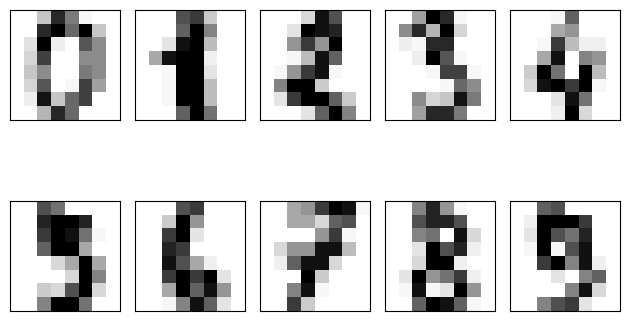

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

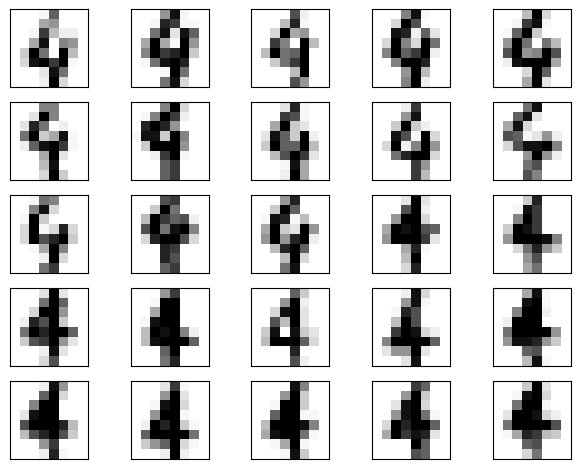

In [3]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
digit = 4
x_digits = X[y == digit]
for i in range(25):
    img = x_digits[i].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


_____
# Single Layer Neural Networks are just Linear and Logistic Regression
The single layer network can be summarized with the notation given by previously covered topics (linear and logistic regression). When we calculated objective functions for linear regression and logistic regression we used the maximum likelihood priciple, showing that (under Gaussian noise) this led to minimizing the squared error of the output.

This is identical to the objective function for generic, single layer neural networks:
$$ \sum_i^M (\mathbf{y}^{(i)}-\hat{\mathbf{y}}^{(i)})^2 $$

Here, the $\mathbf{y}^{(i)}$ is a one-hot-encoded representation of the class for the $i^{th}$ instance.
Adding in terms of single layer neural network explicitly:
$$ J(\mathbf{W}) = \sum_i^M (\mathbf{y}^{(i)}-\phi(\mathbf{W}\cdot \mathbf{x}^{(i)}))^2 $$

Adaline network objective function:
$$ J(\mathbf{W}) = \sum_i^M (\mathbf{y}^{(i)}-\mathbf{W}\cdot \mathbf{x}^{(i)})^2 $$

To solve, we need the gradient:
$$  \nabla J(\mathbf{W}) $$

And then we can use the Widrow-Hoff learning Rule:
$$ \mathbf{W}\leftarrow\mathbf{W} +\eta\nabla J(\mathbf{W}) $$

Which can be separated for each row (they are independent):
$$ \mathbf{w}\leftarrow\mathbf{w} +\eta[ \mathbf{X}*(\mathbf{y}-\mathbf{\hat{y}})] $$

$$ \mathbf{w}_{row}\leftarrow\mathbf{w}_{row} +\eta[ \mathbf{X}*(\mathbf{y}_{row}-\mathbf{\hat{y}}_{row})] $$

The same is true for the update equation of the perceptron with a sigmoid activation function:
$$ \mathbf{w}\leftarrow\mathbf{w} +\eta[ \mathbf{X}*(\mathbf{y}-\mathbf{g(x)})] $$

$$ \mathbf{w}_{row}\leftarrow\mathbf{w}_{row} +\eta[ \mathbf{X}*(\mathbf{y}_{row}-\mathbf{g(x)}_{row})] $$

This means that the update equations are identical to the case of linear and logistic regression, using one-versus-all! So all of this we have already looked at and solved! Yay!! But, what about when we add more layers?


# Multi-layer Case
In the multilayer perceptron, we need to adjust some notation:

<img src="https://raw.githubusercontent.com/eclarson/MachineLearningNotebooks/master/PDF_Slides/MultiLayerNetwork.png" width="500">


## Formulation of multi-layer perceptron
Our objective function becomes:
$$ J(\mathbf{W}) = \sum_k^M (\mathbf{y}^{(k)}-\mathbf{a}^{(L)})^2 $$

And the update equation becomes:
$$  w_{i,j}^{(l)} \leftarrow w_{i,j}^{(l)} - \eta \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}}
\quad \text{   eventually we want   } \quad \mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} - \eta \frac{\partial J(\mathbf{W})}{\partial \mathbf{W}^{(l)}}
$$

However, this is not tractable to compute by hand for each network architecture, so we expand the gradient calculation using the chain rule to get partial derivatives:
$$  \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}} = \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} \frac{\partial\mathbf{z}^{(l)}}{\partial w_{i,j}^{(l)}}   $$

The second term in the partial derivatives is easy to calculate as $a_j^{(l)}$ (see lecture notes), such that:
$$  \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}} = \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} a_j^{(l)}   $$

And our update equation would be:
$$  w_{i,j}^{(l)} \leftarrow w_{i,j}^{(l)} - \eta \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} a_j^{(l)}$$

To calculate the other term, we need to continue to use the chain rule:
$$ \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} = \left[\frac{\partial \mathbf{z}^{(l+1)} }{\partial\mathbf{z}^{(l)}}\right]^T \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l+1)}}  $$

After some derivation, we can see that: 
$$ \frac{\partial \mathbf{z}^{(l+1)} }{\partial\mathbf{z}^{(l)}} = \text{diag}[\mathbf{a}^{(l+1)}*(1-\mathbf{a}^{(l+1)})] \cdot\mathbf{W}^{(l+1)}  $$

and
$$ \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} = \text{diag}[\mathbf{a}^{(l+1)}*(1-\mathbf{a}^{(l+1)})] \cdot\mathbf{W}^{(l+1)} \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l+1)}} $$

This sets up a recurrence relation such that if we know $\frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}}$ for the final layer, we can use it to get the derivatives for the previous layers. For a two layer network, the final layer gradient can be formulated as:
$$  \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(2)}} = \frac{\partial}{\partial\mathbf{z}^{(2)}} (\mathbf{y}^{(k)}-\phi(\mathbf{z}^{(2)}))^2 $$

$$  \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(2)}}  = -2(\mathbf{y}^{(k)}-\mathbf{a}^{(3)})*\mathbf{a}^{(3)}*(1-\mathbf{a}^{(3)}) $$

where $\mathbf{y}^{(k)}$ is the $k^{th}$ instance and $\mathbf{a}^{(3)}$ is the feedforward result for the $k^{th}$ instance. We can make this more explicit by writing the $k^{th}$ instance of $\mathbf{a}^{(3)}$ as $[\mathbf{a}^{(3)}]^{(k)}$. Now the update becomes:

$$  \frac{\partial J(\mathbf{W})}{\partial [\mathbf{z}^{(2)}]^{(k)}}  = -2\left(\mathbf{y}^{(k)}-{[\mathbf{a}^{(3)}]^{(k)}}\right)*{[\mathbf{a}^{(3)}]^{(k)}}*\left(1-{[\mathbf{a}^{(3)}]^{(k)}}\right) $$

Also recall that $\cdot$ represent matrix multiplication and $*$ represents elementwise or row-wise multiplication. For single elements using stochastic gradient descent, the update equation can be given by:

$$ \mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} -\eta \frac{\partial J(\mathbf{W}^{(l)})}{\partial [\mathbf{z}^{(l)}]^{(k)}} \cdot {[\mathbf{a}^{(l)}]^{(k)}} $$

Or can be given by the following for batch gradient descent over a batch of $k$ examples:

$$ \mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} -\eta \sum_k\frac{\partial J(\mathbf{W}^{(l)})}{\partial {[\mathbf{z}^{(l)}]^{(k)}}} \cdot {[\mathbf{a}^{(l)}]^{(k)}} $$





<img src="https://raw.githubusercontent.com/eclarson/MachineLearningNotebooks/master/PDF_Slides/MultiLayerNetwork.png" width="500">


| Equation Summary | Notes |
| --- |  --- |
| $J(\mathbf{W}) = \sum_k^M (\mathbf{y}^{(k)}-\mathbf{a}^{(L)})^2$ | Objective function |
|  $w_{i,j}^{(l)} \leftarrow w_{i,j}^{(l)} - \eta \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}}$  |  Update equation, for $w_{i,j}$ at the $l^{th}$ layer |
|  $  \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}} = \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} \frac{\partial\mathbf{z}^{(l)}}{\partial w_{i,j}^{(l)}}   $  |  Gradient of one element of $w$ expanded with chain rule once |
| $ \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}} = \left[\frac{\partial \mathbf{z}^{(l+1)} }{\partial\mathbf{z}^{(l)}}\right]^T \cdot \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l+1)}} \cdot \frac{\partial\mathbf{z}^{(l)}}{\partial w_{i,j}^{(l)}}  $  | Gradient of one element of $w$ expanded with chain rule many times  |
|  $ \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}} = \text{diag}[\mathbf{a}^{(l+1)}*(1-\mathbf{a}^{(l+1)})] \cdot\mathbf{W}^{(l+1)} \cdot a_j^{(l)} \cdot \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l+1)}}  $  |  Gradient, after solving for each term, with sensitivity from next layer |

These equations provide a great start for us to begin programming - however we still need to vectorize these operations using linear algebra. Vectorizing will enable us to use the acccelerations that are a part of `numpy`.

## Programming a Two Layer Perceptron Base
Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
Original Author: Sebastian Raschka

This is the optional book we use in the course, excellent intuitions and straightforward programming examples please note, however, that this code has been heavily manipulated to reflect our assumptions and notation.

In [5]:
#Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
#Original Author: Sebastian Raschka

import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
# Start with the following functions:
#    init
#    encode_labels
#    initialize weights
#    sigmoid
#    add bias (vector of ones)
#    objective function (cost and regularizer)
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1 ** 2) + np.mean(W2 ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    

In [6]:
# now let's add in the following functions:
#    feedforward
#    fit and predict
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code and derivation below!
        pass
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2, self.b1, self.b2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * gradW1
            self.W2 -= self.eta * gradW2
            self.b1 -= self.eta * gradb1
            self.b2 -= self.eta * gradb2
            

        return self

## Vectorized coding operations in gradient
Recall that we just derived that:

$$ \left[\frac{\partial J(\mathbf{W})}{\partial \mathbf{W}^{(2)}}\right]_{(k)} = \frac{\partial J(\mathbf{W}^{(l)})}{\partial _k\mathbf{z}^{(2)}} \cdot {[\mathbf{a}^{(2)}]^{(k)}} $$

So we need to derive equations for vectorized operations. These can be derived by specifically writing out our current gradient calculations. If we plug in the equations for the final layer gradient, we have that:

$$  \nabla_{(k)}^{(2)} = -2\left(\mathbf{y}^{(k)}-{[\mathbf{a}^{(3)}]^{(k)}}\right){[\mathbf{a}^{(3)}]^{(k)}}\left(1-{[\mathbf{a}^{(3)}]^{(k)}}\right)\cdot {[\mathbf{a}^{(2)}]^{(k)} } $$

where we use $\nabla_{(k)}^{(2)}$ in place of $\left[\frac{\partial J(\mathbf{W})}{\partial \mathbf{W}^{(2)}}\right]_{(k)}$  to simplify the notation. Therefore, the total batch gradient calculation is given by:

$$ \mathbf{\nabla}^{(2)} = \sum_k \nabla_{(k)}^{(2)} $$

This first operation is relatively easy to vectorize because each column in $\mathbf{A}^{(2)}$ corresponds to the $k^{th}$ instance of $[\mathbf{a}^{(2)}]^{(k)}$. Therefore we can simply transpose $\mathbf{A}^{(2)}$ and multiply it by the elementwise multiplications of $\mathbf{y}^{(k)}$ and $[\mathbf{a}^{(3)}]^{(k)}$:

$$ \mathbf{\nabla}^{(2)} = -2(\mathbf{Y}-\mathbf{A}^{(3)})*\mathbf{A}^{(3)}*(1-\mathbf{A}^{(3)})\cdot [\mathbf{A}^{(2)}]^T $$

For convenience, we define another variable, $\mathbf{V}^{(2)}$ (called the sensitivity):

$$ \mathbf{V}^{(2)} = -2(\mathbf{Y}-\mathbf{A}^{(3)})*\mathbf{A}^{(3)}*(1-\mathbf{A}^{(3)}) $$

such that:

$$ \mathbf{\nabla}^{(2)} = \mathbf{V}^{(2)}\cdot [\mathbf{A}^{(2)}]^T $$

Further details about this calculation can be found in the lecture notes or the video here: https://youtu.be/WRr2e7mKCUY


___

Similarly, the calculation of the gradient for the hidden layer, from our derivations was:

$$  \nabla_k^{(1)} = \frac{\partial J(\mathbf{W})}{\partial \mathbf{z}^{(2)}}\cdot \mathbf{W}^{(2)} \cdot \text{diag}[{_k\mathbf{a}^{(2)}}*(1-{_k\mathbf{a}^{(2)}})] \cdot \mathbf{a}^{(1)}$$

$$ \mathbf{\nabla}^{(1)} = \sum_k \nabla_k^{(1)} $$

This can also be vectorized by recognizing that $\frac{\partial J(\mathbf{W})}{\partial \mathbf{z}^{(2)}}$ is a matrix with columns equal to $\frac{\partial J(\mathbf{W})}{\partial {_k\mathbf{z}^{(2)}}}$ for each instance $k$. We have already solved for this: $ \mathbf{V}^{(2)} $. With some algebra, we can find that the computation is represented vectorized as:

$$  \mathbf{V}^{(1)} = \mathbf{A}^{(2)} * (1-\mathbf{A}^{(2)}) * [\mathbf{W}^{(2)}]^T \cdot \mathbf{V}^{(2)} \cdot \mathbf{A}^{(1)}$$

And we define an intermediate sensitivity variable $\mathbf{V}^{(1)}$ as:

$$ \mathbf{V}^{(1)} =  \mathbf{A}^{(2)} * (1-\mathbf{A}^{(2)}) * [\mathbf{W}^{(2)}]^T \cdot \mathbf{V}^{(2)}  $$

such that: 

$$  \mathbf{\nabla}^{(1)} = \mathbf{V}^{(1)}\cdot [\mathbf{A}^{(1)}]^{T} $$

Now we can update the weight vectors according to:

$$ \mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} -\eta \mathbf{\nabla}^{(l)} $$

Let's get programming! All we really need to do is update the `_get_gradient` class method.

In [7]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C * 2
        gradW2 += W2 * self.l2_C * 2 

        return gradW1, gradW2, gradb1, gradb2

In [8]:
%%time

params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=400, # iterations
              eta=0.001,  # learning rate
              random_state=1)

nn = TwoLayerPerceptronVectorized(**params)

nn.fit(X_train, y_train, print_progress=50)
yhat = nn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

Epoch: 400/400

Accuracy: 0.9527777777777777
CPU times: user 6.63 s, sys: 462 ms, total: 7.09 s
Wall time: 959 ms


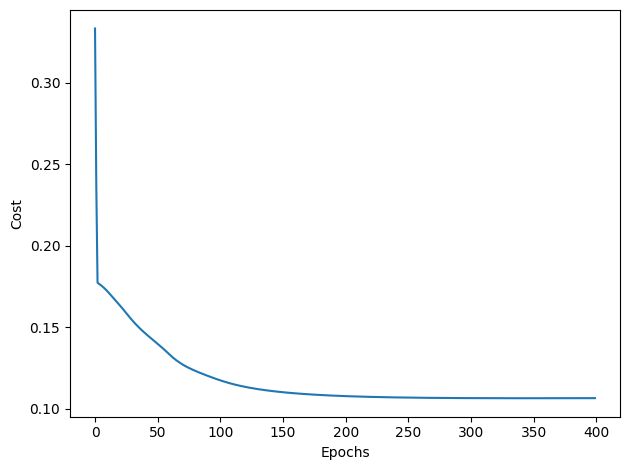

In [9]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

### [Back to slides] 

## Adding complexity and functionality
So now we can calculate the gradient quickly, but we need to account for more optimization methods in this new space because the optmiization surface can be highly non-convex. We need to steer clear of local optima as best as possible.

To start, let's add: 
- some momentum to the calculation 
- $\eta$ learning rate decay
- perform mini-batching of the gradient updates 
- random reshuffling of the inputs

For cooling the learning rate, at epoch $k$:
$$ \mathbf{W}_{k+1} = \mathbf{W}_k - \frac{\eta}{1+\epsilon\cdot k} \cdot \rho_{k} $$

For momentum:
$$ \rho_{k} = \nabla J(\mathbf{W}_k) + \alpha\rho_{k-1} $$

For decaying the learning rate:
$$ \eta_k = \max(\eta_0^{(1+k\cdot d)},\frac{\eta_0}{1000}) $$

where $k$ is the epoch, $\eta_0$ is the starting value of $\eta$, $\eta<1$, and $d<1$, the decreasing constant,. 

Now let's build in these vales

In [10]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
class TLPVectorizedMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, **kwds):        
        # but keep other keywords
        super().__init__(**kwds)
        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
        
    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        
        # outer loop: go through all data one time (epochs)
        for k in range(self.epochs):

            # A better implementation could set the learning rate schedule type
            # and then call a "step" to advance to the next learning rate
            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta, self.eta/1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress>0 and (k+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                # shuffle the data so batches ar different
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches 
            # num batches == self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            # inner loop: go through all mini-batches of data
            for idx in mini: # iterate through each batch

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2)

                # A better implementation could call "add_momentum" and update
                #  the values, rather than placing directly in the "fit" function
                # now use simple momentum to update values
                rho_W1 = eta * gradW1 + (self.alpha * rho_W1_prev) 
                rho_W2 = eta * gradW2 + (self.alpha * rho_W2_prev)
                self.W1 -= rho_W1  # update with momentum
                self.W2 -= rho_W2  # update with momentum
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                
                self.b1 -= eta * gradb1 
                self.b2 -= eta * gradb2 

            self.cost_.append(mini_cost)
            
        return self

In [27]:
%%time
params = dict(n_hidden=50, 
              C=0.01, # tradeoff L2 regularizer
              epochs=400, # iterations
              eta=0.01,  # learning rate
              alpha=0.0, # momentum calculation
              decrease_const=0.0, # decreasing eta
              minibatches=len(X_train)/256, # minibatch size
              shuffle=True,
              random_state=1)

nn_mini = TLPVectorizedMiniBatch(**params)

    
nn_mini.fit(X_train, y_train, print_progress=50)
yhat = nn_mini.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

Epoch: 400/400

Accuracy: 0.9777777777777777
CPU times: user 9.99 s, sys: 1.05 s, total: 11 s
Wall time: 1.5 s


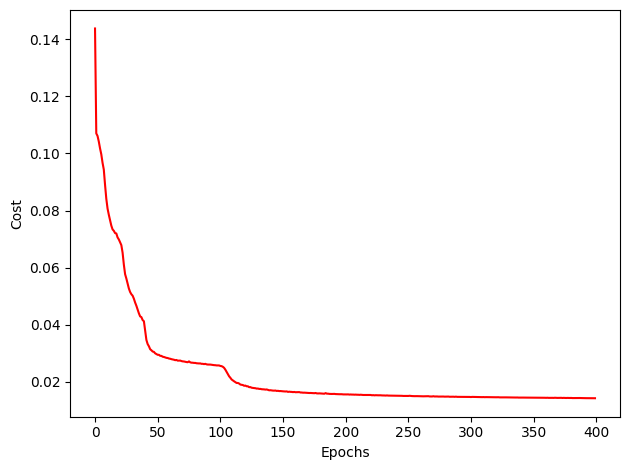

In [28]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

## Using different optimization techniques
While the above implementation is good for a number of applications, we have yet to use more advanced optimization algorithms. Why is that? Shouldn't we remedy this situation?

### Self-test: Should we try quasi-Newton methods on the MLP?
- A. Yes. Quasi-Newton methods converge much faster
- B. Yes. Quasi-Newton methods are guaranteed to find the global optimum
- C. No. There is no guarantee that Quasi-Newton methods will work better in a non-convex space.
- D. No. With so many weights, the Hessian calculation is too complex. 

___

## Quasi-Newton updates for the MLP
Let's try to perform L-BFGS with on the previous models. The easy way of performing this is to add wrapper methods to the `_get_gradient` function in order to pack and unpack the data into the Weights matrices.


In [ ]:
from scipy.optimize import fmin_bfgs
from scipy.optimize import fmin_l_bfgs_b
class TLPVectorizedBFGS(TwoLayerPerceptronVectorized):
    
    def __init__(self, gtol=1e-5, **kwds):        
        # need to add to the original initializer 
        self.gtol = gtol
        
        # but keep other keywords
        super().__init__(**kwds)
        
    @staticmethod
    def _pack(in1, in2, in3, in4):
        '''Pack and flatten input vectors '''
        return np.hstack((in1.flatten(),in2.flatten(),in3.flatten(),in4.flatten()))
    
    def _unpack(self, in_tot):
        '''Undo packing according to layer weight sizes'''
        start = 0
        end = self.W1.size
        out1 = in_tot[start:end].reshape(self.W1.shape)
        start = end
        end += self.W2.size
        out2 = in_tot[start:end].reshape(self.W2.shape)
        start = end
        end += self.b1.size
        out3 = in_tot[start:end].reshape(self.b1.shape)
        start = end
        end += self.b2.size
        out4 = in_tot[start:end].reshape(self.b2.shape)
        return out1, out2, out3, out4
    
    def _calc_cost_gradient_packed(self,W,X_data,Y_enc):
        '''Unpack and get cost, gradient for bfgs'''
        W1, W2, b1, b2 = self._unpack(W) 
        # feedforward all instances
        A1, Z1, A2, Z2, A3 = self._feedforward(X_data, W1, W2, b1, b2)
        
        cost = np.sum((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        cost = cost + L2_term
        #perform back prop to get gradients
        gradW1,gradW2,gradb1,gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3,Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                         W1=W1, W2=W2)
        return cost, self._pack(gradW1,gradW2,gradb1,gradb2)
    
    def _cost_packed(self,W,X_data,Y_enc):
        '''Unpack and calculate MSE for bfgs'''
        W1, W2, b1, b2 = self._unpack(W)
        _, _, _, _, A3 = self._feedforward(X_data,W1,W2,b1,b2)
        return np.sum((Y_enc-A3)**2)
    
    def fit(self,X,y,print_progress=0):
        '''Learn weights from training data'''
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        
        # make initial matrices into single row vector
        W = self._pack(self.W1,self.W2, self.b1, self.b2)
        
        if print_progress>0:
            def callback(xd):
                callback.counter += 1
                if callback.counter%print_progress==0:
                    sys.stderr.write('\rEpoch: %d/%d (max)' % (callback.counter,callback.epochs))
                    sys.stderr.flush()

            callback.counter = 0
            callback.epochs = self.epochs
            
        else:
            callback = None
            
        # compute gradient optimum with bfgs
        W_best,_,props = fmin_l_bfgs_b(
                        x0=W,
                        func=self._calc_cost_gradient_packed,
                        maxfun=self.epochs,
                        callback=callback,
                        pgtol=self.gtol,
                        args=(X_data, Y_enc))
        
        self.W1, self.W2, self.b1, self.b2 = self._unpack(W_best)
        if print_progress:
            print(props)
    

In [ ]:
%%time
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=100, # iterations
              eta=0.1,  # learning rate
              random_state=1)

nn_bfgs = TLPVectorizedBFGS(**params, gtol=1e-3)

nn_bfgs.fit(X_train, y_train, print_progress=1)
yhat = nn_bfgs.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

Wow! That was pretty fast compared to the other implementations we have seen. But don't let this fool you. The L-BFGS implementation is great for smaller datasets, but minibatch/stochastic methods are more optimal as the number of instances in our data gets larger. Eventually they over power the L-BFGS algorithm's ability to move along the curvature effectively and efficiently.  
___
# Using a bigger, more diverse dataset

Now let's load in a more diverse, harder to classify dataset: Fashion MNIST
https://www.kaggle.com/zalando-research/fashionmnist

**Labels**

Each training and test example is assigned to one of the following labels:

- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot 

In [ ]:
# more data 
# Let's use Raschka's implementation for using the fashion mnist dataset:
# https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
import os
import struct
import numpy as np
 
def load_mnist(path, kind='fashion_train'):
    """Load Fashion MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [ ]:
X_train, y_train = load_mnist('data/', kind='fashion_train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('data/', kind='fashion_t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

# don't forget to normalize
X_train = X_train/255.0 - 0.5
X_test = X_test/255.0 - 0.5

print(np.min(X_train),np.max(X_train))

In [ ]:
28*28

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# 0,T-shirt/top
# 1,Trouser
# 2,Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
imgs_of_one_class = X_train[y_train == 7]
for i in range(25):
    img = imgs_of_one_class[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### L-BFGS Optimization for Fashion MNIST
This is a nice test to show that mini-batching has better conversion properties for some datasets.

In [ ]:
%%time
nn_bfgs = TLPVectorizedBFGS( 
                      n_hidden=50, 
                      C=0.1, 
                      epochs=80, # max iterations
                      gtol=1e-2,
                      random_state=1)

nn_bfgs.fit(X_train, y_train, print_progress=1)
yhat = nn_bfgs.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

### MiniBatch Gradient Descent for Fashion MNIST

In [ ]:
%%time
nn_mini = TLPVectorizedMiniBatch( 
                          n_hidden=50, 
                          C=0.1,  
                          epochs=80, 
                          eta=0.1,
                          alpha=0.1,
                          decrease_const=0.1,
                          minibatches=len(X_train)/256, 
                          shuffle=True,
                          random_state=1)

nn_mini.fit(X_train, y_train, print_progress=1)
yhat = nn_mini.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

In [ ]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [ ]:
label_names=[
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

# get first 25 confusions
miscl_img = X_test[y_test != yhat][:25]
correct_lab = y_test[y_test != yhat][:25]
miscl_lab = yhat[y_test != yhat][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%s, (p:%s)' % (label_names[correct_lab[i]],label_names[miscl_lab[i]]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

While these misclassifications are looking mostly okay, we can do better. Is 85% good for Fashion MNIST?  We can check out the leaderboard here: https://paperswithcode.com/sota/image-classification-on-fashion-mnist

But we have some additional implementation details that are needed for practical implementation of neural networks, in order to get them training more efficiently and more meaningfully. These are visited in the next notebook, `08a. Practical Implementation of Neural Networks with Bias`


## In this notebook you learned:
- an introduction to neural networks notation and programming
- using a two-layer perceptron architecture with sigmoid activations
- optimizing this network with mini-batch descent and Quasi-newton methods